In [58]:
# ! pip install sympy 
# ! pip install networkx 
# ! pip install matplotlib 
# ! pip install pyqubo 
# ! pip install gurobipy

In [59]:
from sympy import symbols, Matrix, simplify, Add, Mul
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
import random

In [60]:
def generate_problem_instance(num_nodes, weight_range=(-1, 1)):
    """
    Generate a random problem instance for the min-cut problem.
    :param num_nodes: Number of nodes in the graph.
    :param weight_range: Range of weights for the edges (tuple, inclusive).
    :return: Dictionary {(i, j): weight} representing the edges and their weights.
    """
    edge_dict = {}
    for i in range(1, num_nodes + 1):
        for j in range(i + 1, num_nodes + 1):
            weight = round(random.uniform(weight_range[0], weight_range[1]), 2)
            edge_dict[(i, j)] = weight
    return edge_dict

In [61]:
# Example usage: Generate a graph with 5 nodes
num_nodes = 30
edge_dict = generate_problem_instance(num_nodes)
edge_dict

{(1, 2): 0.87,
 (1, 3): -0.28,
 (1, 4): -0.28,
 (1, 5): 0.43,
 (1, 6): -0.83,
 (1, 7): -0.72,
 (1, 8): -0.73,
 (1, 9): 0.42,
 (1, 10): 0.89,
 (1, 11): -0.55,
 (1, 12): 0.38,
 (1, 13): 0.09,
 (1, 14): -0.27,
 (1, 15): -0.02,
 (1, 16): -0.35,
 (1, 17): -0.19,
 (1, 18): -0.19,
 (1, 19): 0.59,
 (1, 20): 0.61,
 (1, 21): -0.31,
 (1, 22): -0.53,
 (1, 23): 0.02,
 (1, 24): 0.39,
 (1, 25): 0.34,
 (1, 26): 0.22,
 (1, 27): 0.75,
 (1, 28): 0.31,
 (1, 29): 0.39,
 (1, 30): 0.9,
 (2, 3): -0.02,
 (2, 4): 0.5,
 (2, 5): 0.22,
 (2, 6): 0.78,
 (2, 7): 0.82,
 (2, 8): 0.53,
 (2, 9): 0.53,
 (2, 10): 0.17,
 (2, 11): 0.98,
 (2, 12): -0.85,
 (2, 13): 0.34,
 (2, 14): -0.43,
 (2, 15): 0.83,
 (2, 16): 0.77,
 (2, 17): 0.57,
 (2, 18): -0.03,
 (2, 19): 0.06,
 (2, 20): 0.87,
 (2, 21): 0.83,
 (2, 22): 0.82,
 (2, 23): 0.69,
 (2, 24): -0.29,
 (2, 25): -0.33,
 (2, 26): -0.01,
 (2, 27): -0.77,
 (2, 28): -0.01,
 (2, 29): -0.95,
 (2, 30): 0.14,
 (3, 4): 0.13,
 (3, 5): 0.25,
 (3, 6): -0.92,
 (3, 7): -0.39,
 (3, 8): -0.34,
 (3,

In [62]:
# # Example dictionary input
# edge_dict = {
#     (1, 2): -2,
#     (1, 3): 8,
#     (2, 3): -3
# }

# edge_dict

In [63]:
nodes = set()

for edge in edge_dict.keys():
    nodes.update(edge)
nodes = sorted(nodes)
node_index = {node: i for i, node in enumerate(nodes)}

size = len(nodes)
adjacency_matrix = Matrix.zeros(size, size)

for (u, v), weight in edge_dict.items():
    i, j = node_index[u], node_index[v]
    adjacency_matrix[i, j] = weight
    adjacency_matrix[j, i] = weight  # Symmetric matrix for undirected graph

In [64]:
adjacency_matrix

Matrix([
[    0,  0.87, -0.28, -0.28,  0.43, -0.83, -0.72, -0.73,  0.42,  0.89, -0.55,  0.38,  0.09, -0.27, -0.02, -0.35, -0.19, -0.19,  0.59,  0.61, -0.31, -0.53,  0.02,  0.39,  0.34,  0.22,  0.75,  0.31,  0.39,   0.9],
[ 0.87,     0, -0.02,   0.5,  0.22,  0.78,  0.82,  0.53,  0.53,  0.17,  0.98, -0.85,  0.34, -0.43,  0.83,  0.77,  0.57, -0.03,  0.06,  0.87,  0.83,  0.82,  0.69, -0.29, -0.33, -0.01, -0.77, -0.01, -0.95,  0.14],
[-0.28, -0.02,     0,  0.13,  0.25, -0.92, -0.39, -0.34,  0.46,  -0.5,  0.14,  -0.2,  0.79, -0.72, -0.55, -0.01,   0.9, -0.88, -0.37,  0.68, -0.94,  0.61,   0.8,  0.01,  0.34,  0.43,  0.95, -0.68, -0.27, -0.53],
[-0.28,   0.5,  0.13,     0,  -0.3,  0.16, -0.33,  0.68,  0.84, -0.09,  -1.0, -0.71,  0.85,  0.99,   0.4,  0.31,  -0.6, -0.46, -0.38, -0.71, -0.86,  0.89,   0.5, -0.36,  0.07, -0.43,  -0.5, -0.07,  0.41,  0.19],
[ 0.43,  0.22,  0.25,  -0.3,     0, -0.49,  -0.6, -0.41, -0.95,   0.7,  0.44, -0.24,  0.35, -0.01,  0.59, -0.42, -0.49, -0.49, -0.63,  0.64,  0

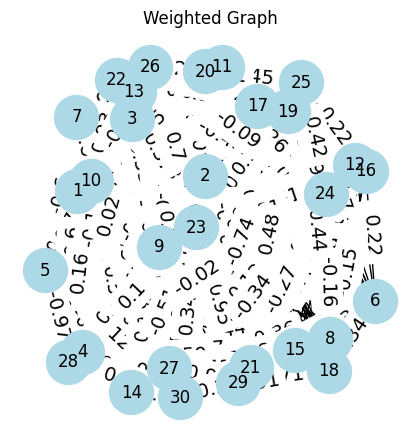

In [65]:
plt.figure(figsize=(4,4))
G = nx.Graph()

for (u, v), weight in edge_dict.items():
    G.add_edge(u, v, weight=weight)

# Create a fixed layout for the graph
pos = nx.spring_layout(G, seed=111)  # Set a seed for reproducibility

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=14)
plt.title("Weighted Graph")
plt.show()

# Formulate the QUBO (Quadratic Unconstrained Binary Optimization) Problem

The MinCut problem can be written as:
$$
\text{Objective: } \min_x \sum_{i,j} w_{ij} x_i (1 - x_j)
$$

where $$x_i, x_j \in \{0,1\}$$

$$x \in \{0,1\}^n$$

$$i,j \in [1,n]$$

In [66]:
n = adjacency_matrix.shape[0]
x = symbols(f"x1:{n+1}")

for i in range(n):
    for j in range(n):
        display(adjacency_matrix[i, j] * x[i] * (1 - x[j]))

qubo_expr = sum([adjacency_matrix[i, j] * x[i] * (1 - x[j]) for i in range(n) for j in range(n)])

qubo_expr

0

0.87*x1*(1 - x2)

-0.28*x1*(1 - x3)

-0.28*x1*(1 - x4)

0.43*x1*(1 - x5)

-0.83*x1*(1 - x6)

-0.72*x1*(1 - x7)

-0.73*x1*(1 - x8)

0.42*x1*(1 - x9)

0.89*x1*(1 - x10)

-0.55*x1*(1 - x11)

0.38*x1*(1 - x12)

0.09*x1*(1 - x13)

-0.27*x1*(1 - x14)

-0.02*x1*(1 - x15)

-0.35*x1*(1 - x16)

-0.19*x1*(1 - x17)

-0.19*x1*(1 - x18)

0.59*x1*(1 - x19)

0.61*x1*(1 - x20)

-0.31*x1*(1 - x21)

-0.53*x1*(1 - x22)

0.02*x1*(1 - x23)

0.39*x1*(1 - x24)

0.34*x1*(1 - x25)

0.22*x1*(1 - x26)

0.75*x1*(1 - x27)

0.31*x1*(1 - x28)

0.39*x1*(1 - x29)

0.9*x1*(1 - x30)

0.87*x2*(1 - x1)

0

-0.02*x2*(1 - x3)

0.5*x2*(1 - x4)

0.22*x2*(1 - x5)

0.78*x2*(1 - x6)

0.82*x2*(1 - x7)

0.53*x2*(1 - x8)

0.53*x2*(1 - x9)

0.17*x2*(1 - x10)

0.98*x2*(1 - x11)

-0.85*x2*(1 - x12)

0.34*x2*(1 - x13)

-0.43*x2*(1 - x14)

0.83*x2*(1 - x15)

0.77*x2*(1 - x16)

0.57*x2*(1 - x17)

-0.03*x2*(1 - x18)

0.06*x2*(1 - x19)

0.87*x2*(1 - x20)

0.83*x2*(1 - x21)

0.82*x2*(1 - x22)

0.69*x2*(1 - x23)

-0.29*x2*(1 - x24)

-0.33*x2*(1 - x25)

-0.01*x2*(1 - x26)

-0.77*x2*(1 - x27)

-0.01*x2*(1 - x28)

-0.95*x2*(1 - x29)

0.14*x2*(1 - x30)

-0.28*x3*(1 - x1)

-0.02*x3*(1 - x2)

0

0.13*x3*(1 - x4)

0.25*x3*(1 - x5)

-0.92*x3*(1 - x6)

-0.39*x3*(1 - x7)

-0.34*x3*(1 - x8)

0.46*x3*(1 - x9)

-0.5*x3*(1 - x10)

0.14*x3*(1 - x11)

-0.2*x3*(1 - x12)

0.79*x3*(1 - x13)

-0.72*x3*(1 - x14)

-0.55*x3*(1 - x15)

-0.01*x3*(1 - x16)

0.9*x3*(1 - x17)

-0.88*x3*(1 - x18)

-0.37*x3*(1 - x19)

0.68*x3*(1 - x20)

-0.94*x3*(1 - x21)

0.61*x3*(1 - x22)

0.8*x3*(1 - x23)

0.01*x3*(1 - x24)

0.34*x3*(1 - x25)

0.43*x3*(1 - x26)

0.95*x3*(1 - x27)

-0.68*x3*(1 - x28)

-0.27*x3*(1 - x29)

-0.53*x3*(1 - x30)

-0.28*x4*(1 - x1)

0.5*x4*(1 - x2)

0.13*x4*(1 - x3)

0

-0.3*x4*(1 - x5)

0.16*x4*(1 - x6)

-0.33*x4*(1 - x7)

0.68*x4*(1 - x8)

0.84*x4*(1 - x9)

-0.09*x4*(1 - x10)

-1.0*x4*(1 - x11)

-0.71*x4*(1 - x12)

0.85*x4*(1 - x13)

0.99*x4*(1 - x14)

0.4*x4*(1 - x15)

0.31*x4*(1 - x16)

-0.6*x4*(1 - x17)

-0.46*x4*(1 - x18)

-0.38*x4*(1 - x19)

-0.71*x4*(1 - x20)

-0.86*x4*(1 - x21)

0.89*x4*(1 - x22)

0.5*x4*(1 - x23)

-0.36*x4*(1 - x24)

0.07*x4*(1 - x25)

-0.43*x4*(1 - x26)

-0.5*x4*(1 - x27)

-0.07*x4*(1 - x28)

0.41*x4*(1 - x29)

0.19*x4*(1 - x30)

0.43*x5*(1 - x1)

0.22*x5*(1 - x2)

0.25*x5*(1 - x3)

-0.3*x5*(1 - x4)

0

-0.49*x5*(1 - x6)

-0.6*x5*(1 - x7)

-0.41*x5*(1 - x8)

-0.95*x5*(1 - x9)

0.7*x5*(1 - x10)

0.44*x5*(1 - x11)

-0.24*x5*(1 - x12)

0.35*x5*(1 - x13)

-0.01*x5*(1 - x14)

0.59*x5*(1 - x15)

-0.42*x5*(1 - x16)

-0.49*x5*(1 - x17)

-0.49*x5*(1 - x18)

-0.63*x5*(1 - x19)

0.64*x5*(1 - x20)

0.74*x5*(1 - x21)

-0.64*x5*(1 - x22)

0.22*x5*(1 - x23)

-0.12*x5*(1 - x24)

-0.49*x5*(1 - x25)

0

0.33*x5*(1 - x27)

-0.97*x5*(1 - x28)

0.29*x5*(1 - x29)

0.12*x5*(1 - x30)

-0.83*x6*(1 - x1)

0.78*x6*(1 - x2)

-0.92*x6*(1 - x3)

0.16*x6*(1 - x4)

-0.49*x6*(1 - x5)

0

-0.75*x6*(1 - x7)

-0.97*x6*(1 - x8)

-0.39*x6*(1 - x9)

-0.95*x6*(1 - x10)

-0.67*x6*(1 - x11)

-0.09*x6*(1 - x12)

-0.27*x6*(1 - x13)

-0.89*x6*(1 - x14)

0.93*x6*(1 - x15)

0.22*x6*(1 - x16)

-0.21*x6*(1 - x17)

0.34*x6*(1 - x18)

0.26*x6*(1 - x19)

0.41*x6*(1 - x20)

-0.15*x6*(1 - x21)

-0.31*x6*(1 - x22)

-0.92*x6*(1 - x23)

0.9*x6*(1 - x24)

0.47*x6*(1 - x25)

-0.64*x6*(1 - x26)

-0.36*x6*(1 - x27)

-0.44*x6*(1 - x28)

-0.54*x6*(1 - x29)

0.78*x6*(1 - x30)

-0.72*x7*(1 - x1)

0.82*x7*(1 - x2)

-0.39*x7*(1 - x3)

-0.33*x7*(1 - x4)

-0.6*x7*(1 - x5)

-0.75*x7*(1 - x6)

0

-0.79*x7*(1 - x8)

0.18*x7*(1 - x9)

0.87*x7*(1 - x10)

0.89*x7*(1 - x11)

-0.38*x7*(1 - x12)

-0.71*x7*(1 - x13)

0.03*x7*(1 - x14)

-0.74*x7*(1 - x15)

-0.91*x7*(1 - x16)

-0.34*x7*(1 - x17)

-0.23*x7*(1 - x18)

0.94*x7*(1 - x19)

0.48*x7*(1 - x20)

-0.41*x7*(1 - x21)

-0.71*x7*(1 - x22)

0.33*x7*(1 - x23)

-0.49*x7*(1 - x24)

0.96*x7*(1 - x25)

-0.52*x7*(1 - x26)

-0.14*x7*(1 - x27)

0.6*x7*(1 - x28)

-0.85*x7*(1 - x29)

-0.34*x7*(1 - x30)

-0.73*x8*(1 - x1)

0.53*x8*(1 - x2)

-0.34*x8*(1 - x3)

0.68*x8*(1 - x4)

-0.41*x8*(1 - x5)

-0.97*x8*(1 - x6)

-0.79*x8*(1 - x7)

0

-0.05*x8*(1 - x9)

-0.36*x8*(1 - x10)

0.61*x8*(1 - x11)

0.69*x8*(1 - x12)

-0.4*x8*(1 - x13)

-0.54*x8*(1 - x14)

0.38*x8*(1 - x15)

0.34*x8*(1 - x16)

-0.64*x8*(1 - x17)

0.94*x8*(1 - x18)

0.73*x8*(1 - x19)

-0.21*x8*(1 - x20)

0.5*x8*(1 - x21)

-0.89*x8*(1 - x22)

0.5*x8*(1 - x23)

-0.66*x8*(1 - x24)

0.07*x8*(1 - x25)

-0.97*x8*(1 - x26)

0.78*x8*(1 - x27)

-0.77*x8*(1 - x28)

-0.45*x8*(1 - x29)

0.82*x8*(1 - x30)

0.42*x9*(1 - x1)

0.53*x9*(1 - x2)

0.46*x9*(1 - x3)

0.84*x9*(1 - x4)

-0.95*x9*(1 - x5)

-0.39*x9*(1 - x6)

0.18*x9*(1 - x7)

-0.05*x9*(1 - x8)

0

0.28*x9*(1 - x10)

-0.01*x9*(1 - x11)

-0.58*x9*(1 - x12)

-0.41*x9*(1 - x13)

0.19*x9*(1 - x14)

-0.58*x9*(1 - x15)

0.18*x9*(1 - x16)

0.65*x9*(1 - x17)

0.5*x9*(1 - x18)

-0.25*x9*(1 - x19)

-0.78*x9*(1 - x20)

0.64*x9*(1 - x21)

0.53*x9*(1 - x22)

0.26*x9*(1 - x23)

0.32*x9*(1 - x24)

0.94*x9*(1 - x25)

0.37*x9*(1 - x26)

0.14*x9*(1 - x27)

0.85*x9*(1 - x28)

0.22*x9*(1 - x29)

0.29*x9*(1 - x30)

0.89*x10*(1 - x1)

0.17*x10*(1 - x2)

-0.5*x10*(1 - x3)

-0.09*x10*(1 - x4)

0.7*x10*(1 - x5)

-0.95*x10*(1 - x6)

0.87*x10*(1 - x7)

-0.36*x10*(1 - x8)

0.28*x10*(1 - x9)

0

0.72*x10*(1 - x11)

0.57*x10*(1 - x12)

0.96*x10*(1 - x13)

0.54*x10*(1 - x14)

0.14*x10*(1 - x15)

0.2*x10*(1 - x16)

0.74*x10*(1 - x17)

0.21*x10*(1 - x18)

-0.27*x10*(1 - x19)

0.85*x10*(1 - x20)

0.75*x10*(1 - x21)

0.93*x10*(1 - x22)

-0.41*x10*(1 - x23)

-0.85*x10*(1 - x24)

0.05*x10*(1 - x25)

-0.33*x10*(1 - x26)

0.98*x10*(1 - x27)

0.16*x10*(1 - x28)

-0.81*x10*(1 - x29)

0.48*x10*(1 - x30)

-0.55*x11*(1 - x1)

0.98*x11*(1 - x2)

0.14*x11*(1 - x3)

-1.0*x11*(1 - x4)

0.44*x11*(1 - x5)

-0.67*x11*(1 - x6)

0.89*x11*(1 - x7)

0.61*x11*(1 - x8)

-0.01*x11*(1 - x9)

0.72*x11*(1 - x10)

0

0.16*x11*(1 - x12)

-0.25*x11*(1 - x13)

-0.26*x11*(1 - x14)

-0.92*x11*(1 - x15)

-0.95*x11*(1 - x16)

0.01*x11*(1 - x17)

0.87*x11*(1 - x18)

0.78*x11*(1 - x19)

0.17*x11*(1 - x20)

0.63*x11*(1 - x21)

-0.26*x11*(1 - x22)

-0.68*x11*(1 - x23)

-0.32*x11*(1 - x24)

0.37*x11*(1 - x25)

0.42*x11*(1 - x26)

-0.68*x11*(1 - x27)

0.26*x11*(1 - x28)

0.24*x11*(1 - x29)

-0.02*x11*(1 - x30)

0.38*x12*(1 - x1)

-0.85*x12*(1 - x2)

-0.2*x12*(1 - x3)

-0.71*x12*(1 - x4)

-0.24*x12*(1 - x5)

-0.09*x12*(1 - x6)

-0.38*x12*(1 - x7)

0.69*x12*(1 - x8)

-0.58*x12*(1 - x9)

0.57*x12*(1 - x10)

0.16*x12*(1 - x11)

0

0.36*x12*(1 - x13)

-0.49*x12*(1 - x14)

0.64*x12*(1 - x15)

0.5*x12*(1 - x16)

0.08*x12*(1 - x17)

-0.16*x12*(1 - x18)

-0.46*x12*(1 - x19)

-0.23*x12*(1 - x20)

0.53*x12*(1 - x21)

0.94*x12*(1 - x22)

0.05*x12*(1 - x23)

0.69*x12*(1 - x24)

-0.49*x12*(1 - x25)

-0.74*x12*(1 - x26)

-0.36*x12*(1 - x27)

-0.63*x12*(1 - x28)

0.8*x12*(1 - x29)

0.66*x12*(1 - x30)

0.09*x13*(1 - x1)

0.34*x13*(1 - x2)

0.79*x13*(1 - x3)

0.85*x13*(1 - x4)

0.35*x13*(1 - x5)

-0.27*x13*(1 - x6)

-0.71*x13*(1 - x7)

-0.4*x13*(1 - x8)

-0.41*x13*(1 - x9)

0.96*x13*(1 - x10)

-0.25*x13*(1 - x11)

0.36*x13*(1 - x12)

0

-0.36*x13*(1 - x14)

0.67*x13*(1 - x15)

-0.27*x13*(1 - x16)

-0.52*x13*(1 - x17)

-0.5*x13*(1 - x18)

-0.45*x13*(1 - x19)

0.64*x13*(1 - x20)

-0.47*x13*(1 - x21)

-0.45*x13*(1 - x22)

0.53*x13*(1 - x23)

-0.39*x13*(1 - x24)

0.22*x13*(1 - x25)

-0.32*x13*(1 - x26)

0.85*x13*(1 - x27)

-0.46*x13*(1 - x28)

-0.24*x13*(1 - x29)

-0.53*x13*(1 - x30)

-0.27*x14*(1 - x1)

-0.43*x14*(1 - x2)

-0.72*x14*(1 - x3)

0.99*x14*(1 - x4)

-0.01*x14*(1 - x5)

-0.89*x14*(1 - x6)

0.03*x14*(1 - x7)

-0.54*x14*(1 - x8)

0.19*x14*(1 - x9)

0.54*x14*(1 - x10)

-0.26*x14*(1 - x11)

-0.49*x14*(1 - x12)

-0.36*x14*(1 - x13)

0

0.68*x14*(1 - x15)

-0.31*x14*(1 - x16)

-0.94*x14*(1 - x17)

-0.88*x14*(1 - x18)

0.85*x14*(1 - x19)

0.06*x14*(1 - x20)

0.53*x14*(1 - x21)

-0.45*x14*(1 - x22)

-0.51*x14*(1 - x23)

-0.36*x14*(1 - x24)

-0.66*x14*(1 - x25)

-0.96*x14*(1 - x26)

-0.85*x14*(1 - x27)

0.95*x14*(1 - x28)

0.97*x14*(1 - x29)

0.5*x14*(1 - x30)

-0.02*x15*(1 - x1)

0.83*x15*(1 - x2)

-0.55*x15*(1 - x3)

0.4*x15*(1 - x4)

0.59*x15*(1 - x5)

0.93*x15*(1 - x6)

-0.74*x15*(1 - x7)

0.38*x15*(1 - x8)

-0.58*x15*(1 - x9)

0.14*x15*(1 - x10)

-0.92*x15*(1 - x11)

0.64*x15*(1 - x12)

0.67*x15*(1 - x13)

0.68*x15*(1 - x14)

0

-0.19*x15*(1 - x16)

-0.42*x15*(1 - x17)

-0.54*x15*(1 - x18)

0.34*x15*(1 - x19)

0.66*x15*(1 - x20)

0.9*x15*(1 - x21)

-0.8*x15*(1 - x22)

0.45*x15*(1 - x23)

0.55*x15*(1 - x24)

-0.09*x15*(1 - x25)

-0.09*x15*(1 - x26)

0.83*x15*(1 - x27)

-0.59*x15*(1 - x28)

-0.54*x15*(1 - x29)

0.29*x15*(1 - x30)

-0.35*x16*(1 - x1)

0.77*x16*(1 - x2)

-0.01*x16*(1 - x3)

0.31*x16*(1 - x4)

-0.42*x16*(1 - x5)

0.22*x16*(1 - x6)

-0.91*x16*(1 - x7)

0.34*x16*(1 - x8)

0.18*x16*(1 - x9)

0.2*x16*(1 - x10)

-0.95*x16*(1 - x11)

0.5*x16*(1 - x12)

-0.27*x16*(1 - x13)

-0.31*x16*(1 - x14)

-0.19*x16*(1 - x15)

0

-0.27*x16*(1 - x17)

-0.15*x16*(1 - x18)

0.03*x16*(1 - x19)

-0.23*x16*(1 - x20)

-0.87*x16*(1 - x21)

-0.8*x16*(1 - x22)

0.61*x16*(1 - x23)

0.12*x16*(1 - x24)

0.22*x16*(1 - x25)

-0.16*x16*(1 - x26)

-0.17*x16*(1 - x27)

-0.63*x16*(1 - x28)

-0.45*x16*(1 - x29)

-0.54*x16*(1 - x30)

-0.19*x17*(1 - x1)

0.57*x17*(1 - x2)

0.9*x17*(1 - x3)

-0.6*x17*(1 - x4)

-0.49*x17*(1 - x5)

-0.21*x17*(1 - x6)

-0.34*x17*(1 - x7)

-0.64*x17*(1 - x8)

0.65*x17*(1 - x9)

0.74*x17*(1 - x10)

0.01*x17*(1 - x11)

0.08*x17*(1 - x12)

-0.52*x17*(1 - x13)

-0.94*x17*(1 - x14)

-0.42*x17*(1 - x15)

-0.27*x17*(1 - x16)

0

-0.35*x17*(1 - x18)

0.27*x17*(1 - x19)

0.41*x17*(1 - x20)

0.62*x17*(1 - x21)

0.17*x17*(1 - x22)

0.69*x17*(1 - x23)

-0.27*x17*(1 - x24)

-0.04*x17*(1 - x25)

0.19*x17*(1 - x26)

0.04*x17*(1 - x27)

0.01*x17*(1 - x28)

-0.32*x17*(1 - x29)

-0.42*x17*(1 - x30)

-0.19*x18*(1 - x1)

-0.03*x18*(1 - x2)

-0.88*x18*(1 - x3)

-0.46*x18*(1 - x4)

-0.49*x18*(1 - x5)

0.34*x18*(1 - x6)

-0.23*x18*(1 - x7)

0.94*x18*(1 - x8)

0.5*x18*(1 - x9)

0.21*x18*(1 - x10)

0.87*x18*(1 - x11)

-0.16*x18*(1 - x12)

-0.5*x18*(1 - x13)

-0.88*x18*(1 - x14)

-0.54*x18*(1 - x15)

-0.15*x18*(1 - x16)

-0.35*x18*(1 - x17)

0

-0.74*x18*(1 - x19)

-0.65*x18*(1 - x20)

0.95*x18*(1 - x21)

-0.94*x18*(1 - x22)

0.26*x18*(1 - x23)

-0.16*x18*(1 - x24)

-0.44*x18*(1 - x25)

-0.8*x18*(1 - x26)

0.93*x18*(1 - x27)

0.6*x18*(1 - x28)

0.71*x18*(1 - x29)

-0.91*x18*(1 - x30)

0.59*x19*(1 - x1)

0.06*x19*(1 - x2)

-0.37*x19*(1 - x3)

-0.38*x19*(1 - x4)

-0.63*x19*(1 - x5)

0.26*x19*(1 - x6)

0.94*x19*(1 - x7)

0.73*x19*(1 - x8)

-0.25*x19*(1 - x9)

-0.27*x19*(1 - x10)

0.78*x19*(1 - x11)

-0.46*x19*(1 - x12)

-0.45*x19*(1 - x13)

0.85*x19*(1 - x14)

0.34*x19*(1 - x15)

0.03*x19*(1 - x16)

0.27*x19*(1 - x17)

-0.74*x19*(1 - x18)

0

0.32*x19*(1 - x20)

-0.96*x19*(1 - x21)

0.92*x19*(1 - x22)

0.06*x19*(1 - x23)

-0.79*x19*(1 - x24)

0.59*x19*(1 - x25)

-0.97*x19*(1 - x26)

-0.36*x19*(1 - x27)

-0.93*x19*(1 - x28)

-0.48*x19*(1 - x29)

0.64*x19*(1 - x30)

0.61*x20*(1 - x1)

0.87*x20*(1 - x2)

0.68*x20*(1 - x3)

-0.71*x20*(1 - x4)

0.64*x20*(1 - x5)

0.41*x20*(1 - x6)

0.48*x20*(1 - x7)

-0.21*x20*(1 - x8)

-0.78*x20*(1 - x9)

0.85*x20*(1 - x10)

0.17*x20*(1 - x11)

-0.23*x20*(1 - x12)

0.64*x20*(1 - x13)

0.06*x20*(1 - x14)

0.66*x20*(1 - x15)

-0.23*x20*(1 - x16)

0.41*x20*(1 - x17)

-0.65*x20*(1 - x18)

0.32*x20*(1 - x19)

0

-0.87*x20*(1 - x21)

0.36*x20*(1 - x22)

-0.04*x20*(1 - x23)

-0.26*x20*(1 - x24)

0.45*x20*(1 - x25)

0.22*x20*(1 - x26)

-0.43*x20*(1 - x27)

-0.86*x20*(1 - x28)

-0.22*x20*(1 - x29)

0.1*x20*(1 - x30)

-0.31*x21*(1 - x1)

0.83*x21*(1 - x2)

-0.94*x21*(1 - x3)

-0.86*x21*(1 - x4)

0.74*x21*(1 - x5)

-0.15*x21*(1 - x6)

-0.41*x21*(1 - x7)

0.5*x21*(1 - x8)

0.64*x21*(1 - x9)

0.75*x21*(1 - x10)

0.63*x21*(1 - x11)

0.53*x21*(1 - x12)

-0.47*x21*(1 - x13)

0.53*x21*(1 - x14)

0.9*x21*(1 - x15)

-0.87*x21*(1 - x16)

0.62*x21*(1 - x17)

0.95*x21*(1 - x18)

-0.96*x21*(1 - x19)

-0.87*x21*(1 - x20)

0

-0.14*x21*(1 - x22)

-0.05*x21*(1 - x23)

0.86*x21*(1 - x24)

0.09*x21*(1 - x25)

0.12*x21*(1 - x26)

0.41*x21*(1 - x27)

0.4*x21*(1 - x28)

0.45*x21*(1 - x29)

-0.15*x21*(1 - x30)

-0.53*x22*(1 - x1)

0.82*x22*(1 - x2)

0.61*x22*(1 - x3)

0.89*x22*(1 - x4)

-0.64*x22*(1 - x5)

-0.31*x22*(1 - x6)

-0.71*x22*(1 - x7)

-0.89*x22*(1 - x8)

0.53*x22*(1 - x9)

0.93*x22*(1 - x10)

-0.26*x22*(1 - x11)

0.94*x22*(1 - x12)

-0.45*x22*(1 - x13)

-0.45*x22*(1 - x14)

-0.8*x22*(1 - x15)

-0.8*x22*(1 - x16)

0.17*x22*(1 - x17)

-0.94*x22*(1 - x18)

0.92*x22*(1 - x19)

0.36*x22*(1 - x20)

-0.14*x22*(1 - x21)

0

0.37*x22*(1 - x23)

-0.48*x22*(1 - x24)

-0.99*x22*(1 - x25)

-0.78*x22*(1 - x26)

-0.04*x22*(1 - x27)

-0.11*x22*(1 - x28)

-0.08*x22*(1 - x29)

-0.98*x22*(1 - x30)

0.02*x23*(1 - x1)

0.69*x23*(1 - x2)

0.8*x23*(1 - x3)

0.5*x23*(1 - x4)

0.22*x23*(1 - x5)

-0.92*x23*(1 - x6)

0.33*x23*(1 - x7)

0.5*x23*(1 - x8)

0.26*x23*(1 - x9)

-0.41*x23*(1 - x10)

-0.68*x23*(1 - x11)

0.05*x23*(1 - x12)

0.53*x23*(1 - x13)

-0.51*x23*(1 - x14)

0.45*x23*(1 - x15)

0.61*x23*(1 - x16)

0.69*x23*(1 - x17)

0.26*x23*(1 - x18)

0.06*x23*(1 - x19)

-0.04*x23*(1 - x20)

-0.05*x23*(1 - x21)

0.37*x23*(1 - x22)

0

0.81*x23*(1 - x24)

0.12*x23*(1 - x25)

0.7*x23*(1 - x26)

0.87*x23*(1 - x27)

0.1*x23*(1 - x28)

0.95*x23*(1 - x29)

0.34*x23*(1 - x30)

0.39*x24*(1 - x1)

-0.29*x24*(1 - x2)

0.01*x24*(1 - x3)

-0.36*x24*(1 - x4)

-0.12*x24*(1 - x5)

0.9*x24*(1 - x6)

-0.49*x24*(1 - x7)

-0.66*x24*(1 - x8)

0.32*x24*(1 - x9)

-0.85*x24*(1 - x10)

-0.32*x24*(1 - x11)

0.69*x24*(1 - x12)

-0.39*x24*(1 - x13)

-0.36*x24*(1 - x14)

0.55*x24*(1 - x15)

0.12*x24*(1 - x16)

-0.27*x24*(1 - x17)

-0.16*x24*(1 - x18)

-0.79*x24*(1 - x19)

-0.26*x24*(1 - x20)

0.86*x24*(1 - x21)

-0.48*x24*(1 - x22)

0.81*x24*(1 - x23)

0

0.42*x24*(1 - x25)

-0.09*x24*(1 - x26)

0.13*x24*(1 - x27)

-0.02*x24*(1 - x28)

-0.27*x24*(1 - x29)

-0.34*x24*(1 - x30)

0.34*x25*(1 - x1)

-0.33*x25*(1 - x2)

0.34*x25*(1 - x3)

0.07*x25*(1 - x4)

-0.49*x25*(1 - x5)

0.47*x25*(1 - x6)

0.96*x25*(1 - x7)

0.07*x25*(1 - x8)

0.94*x25*(1 - x9)

0.05*x25*(1 - x10)

0.37*x25*(1 - x11)

-0.49*x25*(1 - x12)

0.22*x25*(1 - x13)

-0.66*x25*(1 - x14)

-0.09*x25*(1 - x15)

0.22*x25*(1 - x16)

-0.04*x25*(1 - x17)

-0.44*x25*(1 - x18)

0.59*x25*(1 - x19)

0.45*x25*(1 - x20)

0.09*x25*(1 - x21)

-0.99*x25*(1 - x22)

0.12*x25*(1 - x23)

0.42*x25*(1 - x24)

0

0.41*x25*(1 - x26)

0.06*x25*(1 - x27)

-0.71*x25*(1 - x28)

0.48*x25*(1 - x29)

-0.74*x25*(1 - x30)

0.22*x26*(1 - x1)

-0.01*x26*(1 - x2)

0.43*x26*(1 - x3)

-0.43*x26*(1 - x4)

0

-0.64*x26*(1 - x6)

-0.52*x26*(1 - x7)

-0.97*x26*(1 - x8)

0.37*x26*(1 - x9)

-0.33*x26*(1 - x10)

0.42*x26*(1 - x11)

-0.74*x26*(1 - x12)

-0.32*x26*(1 - x13)

-0.96*x26*(1 - x14)

-0.09*x26*(1 - x15)

-0.16*x26*(1 - x16)

0.19*x26*(1 - x17)

-0.8*x26*(1 - x18)

-0.97*x26*(1 - x19)

0.22*x26*(1 - x20)

0.12*x26*(1 - x21)

-0.78*x26*(1 - x22)

0.7*x26*(1 - x23)

-0.09*x26*(1 - x24)

0.41*x26*(1 - x25)

0

-0.94*x26*(1 - x27)

0.02*x26*(1 - x28)

0.09*x26*(1 - x29)

0.21*x26*(1 - x30)

0.75*x27*(1 - x1)

-0.77*x27*(1 - x2)

0.95*x27*(1 - x3)

-0.5*x27*(1 - x4)

0.33*x27*(1 - x5)

-0.36*x27*(1 - x6)

-0.14*x27*(1 - x7)

0.78*x27*(1 - x8)

0.14*x27*(1 - x9)

0.98*x27*(1 - x10)

-0.68*x27*(1 - x11)

-0.36*x27*(1 - x12)

0.85*x27*(1 - x13)

-0.85*x27*(1 - x14)

0.83*x27*(1 - x15)

-0.17*x27*(1 - x16)

0.04*x27*(1 - x17)

0.93*x27*(1 - x18)

-0.36*x27*(1 - x19)

-0.43*x27*(1 - x20)

0.41*x27*(1 - x21)

-0.04*x27*(1 - x22)

0.87*x27*(1 - x23)

0.13*x27*(1 - x24)

0.06*x27*(1 - x25)

-0.94*x27*(1 - x26)

0

-0.47*x27*(1 - x28)

-0.98*x27*(1 - x29)

0.05*x27*(1 - x30)

0.31*x28*(1 - x1)

-0.01*x28*(1 - x2)

-0.68*x28*(1 - x3)

-0.07*x28*(1 - x4)

-0.97*x28*(1 - x5)

-0.44*x28*(1 - x6)

0.6*x28*(1 - x7)

-0.77*x28*(1 - x8)

0.85*x28*(1 - x9)

0.16*x28*(1 - x10)

0.26*x28*(1 - x11)

-0.63*x28*(1 - x12)

-0.46*x28*(1 - x13)

0.95*x28*(1 - x14)

-0.59*x28*(1 - x15)

-0.63*x28*(1 - x16)

0.01*x28*(1 - x17)

0.6*x28*(1 - x18)

-0.93*x28*(1 - x19)

-0.86*x28*(1 - x20)

0.4*x28*(1 - x21)

-0.11*x28*(1 - x22)

0.1*x28*(1 - x23)

-0.02*x28*(1 - x24)

-0.71*x28*(1 - x25)

0.02*x28*(1 - x26)

-0.47*x28*(1 - x27)

0

-0.15*x28*(1 - x29)

0.02*x28*(1 - x30)

0.39*x29*(1 - x1)

-0.95*x29*(1 - x2)

-0.27*x29*(1 - x3)

0.41*x29*(1 - x4)

0.29*x29*(1 - x5)

-0.54*x29*(1 - x6)

-0.85*x29*(1 - x7)

-0.45*x29*(1 - x8)

0.22*x29*(1 - x9)

-0.81*x29*(1 - x10)

0.24*x29*(1 - x11)

0.8*x29*(1 - x12)

-0.24*x29*(1 - x13)

0.97*x29*(1 - x14)

-0.54*x29*(1 - x15)

-0.45*x29*(1 - x16)

-0.32*x29*(1 - x17)

0.71*x29*(1 - x18)

-0.48*x29*(1 - x19)

-0.22*x29*(1 - x20)

0.45*x29*(1 - x21)

-0.08*x29*(1 - x22)

0.95*x29*(1 - x23)

-0.27*x29*(1 - x24)

0.48*x29*(1 - x25)

0.09*x29*(1 - x26)

-0.98*x29*(1 - x27)

-0.15*x29*(1 - x28)

0

-0.2*x29*(1 - x30)

0.9*x30*(1 - x1)

0.14*x30*(1 - x2)

-0.53*x30*(1 - x3)

0.19*x30*(1 - x4)

0.12*x30*(1 - x5)

0.78*x30*(1 - x6)

-0.34*x30*(1 - x7)

0.82*x30*(1 - x8)

0.29*x30*(1 - x9)

0.48*x30*(1 - x10)

-0.02*x30*(1 - x11)

0.66*x30*(1 - x12)

-0.53*x30*(1 - x13)

0.5*x30*(1 - x14)

0.29*x30*(1 - x15)

-0.54*x30*(1 - x16)

-0.42*x30*(1 - x17)

-0.91*x30*(1 - x18)

0.64*x30*(1 - x19)

0.1*x30*(1 - x20)

-0.15*x30*(1 - x21)

-0.98*x30*(1 - x22)

0.34*x30*(1 - x23)

-0.34*x30*(1 - x24)

-0.74*x30*(1 - x25)

0.21*x30*(1 - x26)

0.05*x30*(1 - x27)

0.02*x30*(1 - x28)

-0.2*x30*(1 - x29)

0

0.89*x1*(1 - x10) - 0.55*x1*(1 - x11) + 0.38*x1*(1 - x12) + 0.09*x1*(1 - x13) - 0.27*x1*(1 - x14) - 0.02*x1*(1 - x15) - 0.35*x1*(1 - x16) - 0.19*x1*(1 - x17) - 0.19*x1*(1 - x18) + 0.59*x1*(1 - x19) + 0.87*x1*(1 - x2) + 0.61*x1*(1 - x20) - 0.31*x1*(1 - x21) - 0.53*x1*(1 - x22) + 0.02*x1*(1 - x23) + 0.39*x1*(1 - x24) + 0.34*x1*(1 - x25) + 0.22*x1*(1 - x26) + 0.75*x1*(1 - x27) + 0.31*x1*(1 - x28) + 0.39*x1*(1 - x29) - 0.28*x1*(1 - x3) + 0.9*x1*(1 - x30) - 0.28*x1*(1 - x4) + 0.43*x1*(1 - x5) - 0.83*x1*(1 - x6) - 0.72*x1*(1 - x7) - 0.73*x1*(1 - x8) + 0.42*x1*(1 - x9) + 0.89*x10*(1 - x1) + 0.72*x10*(1 - x11) + 0.57*x10*(1 - x12) + 0.96*x10*(1 - x13) + 0.54*x10*(1 - x14) + 0.14*x10*(1 - x15) + 0.2*x10*(1 - x16) + 0.74*x10*(1 - x17) + 0.21*x10*(1 - x18) - 0.27*x10*(1 - x19) + 0.17*x10*(1 - x2) + 0.85*x10*(1 - x20) + 0.75*x10*(1 - x21) + 0.93*x10*(1 - x22) - 0.41*x10*(1 - x23) - 0.85*x10*(1 - x24) + 0.05*x10*(1 - x25) - 0.33*x10*(1 - x26) + 0.98*x10*(1 - x27) + 0.16*x10*(1 - x28) - 0.81*x10*(1 

In [67]:
simplified_qubo = simplify(qubo_expr)
simplified_qubo

-1.78*x1*x10 + 1.1*x1*x11 - 0.76*x1*x12 - 0.18*x1*x13 + 0.54*x1*x14 + 0.04*x1*x15 + 0.7*x1*x16 + 0.38*x1*x17 + 0.38*x1*x18 - 1.18*x1*x19 - 1.74*x1*x2 - 1.22*x1*x20 + 0.62*x1*x21 + 1.06*x1*x22 - 0.04*x1*x23 - 0.78*x1*x24 - 0.68*x1*x25 - 0.44*x1*x26 - 1.5*x1*x27 - 0.62*x1*x28 - 0.78*x1*x29 + 0.56*x1*x3 - 1.8*x1*x30 + 0.56*x1*x4 - 0.86*x1*x5 + 1.66*x1*x6 + 1.44*x1*x7 + 1.46*x1*x8 - 0.84*x1*x9 + 2.35*x1 - 1.44*x10*x11 - 1.14*x10*x12 - 1.92*x10*x13 - 1.08*x10*x14 - 0.28*x10*x15 - 0.4*x10*x16 - 1.48*x10*x17 - 0.42*x10*x18 + 0.54*x10*x19 - 0.34*x10*x2 - 1.7*x10*x20 - 1.5*x10*x21 - 1.86*x10*x22 + 0.82*x10*x23 + 1.7*x10*x24 - 0.1*x10*x25 + 0.66*x10*x26 - 1.96*x10*x27 - 0.32*x10*x28 + 1.62*x10*x29 + 1.0*x10*x3 - 0.96*x10*x30 + 0.18*x10*x4 - 1.4*x10*x5 + 1.9*x10*x6 - 1.74*x10*x7 + 0.72*x10*x8 - 0.56*x10*x9 + 6.62*x10 - 0.32*x11*x12 + 0.5*x11*x13 + 0.52*x11*x14 + 1.84*x11*x15 + 1.9*x11*x16 - 0.02*x11*x17 - 1.74*x11*x18 - 1.56*x11*x19 - 1.96*x11*x2 - 0.34*x11*x20 - 1.26*x11*x21 + 0.52*x11*x22 + 1.3

In [68]:
# x1, x2 = symbols('x1 x2')
# term = 0.18 * x1 * x2

# # term.coeff()



In [69]:
# from sympy import symbols

# # Define the variables
# x1, x2 = symbols('x1 x2')

# # Example term
# term = 0.18 * x1 * x2

# # Extract the coefficient of the specific term (x1 * x2)
# coefficient = term.coeff(Mul(*(term.free_symbols)))

# print("Term:", term)
# print("Coefficient:", coefficient)


In [70]:
# Extract coefficients for QUBO matrix
Q = Matrix.zeros(n, n)
for term in simplified_qubo.as_ordered_terms():
    variables = term.free_symbols
    coeff = term.coeff(Mul(*(variables)))
    if len(variables) == 1:  # Diagonal terms (linear coefficients)
        var = list(variables)[0]
        idx = int(str(var)[1:]) - 1
        Q[idx, idx] += coeff
    elif len(variables) == 2:  # Off-diagonal terms (quadratic coefficients)
        var1, var2 = sorted(variables, key=lambda v: int(str(v)[1:]))
        idx1, idx2 = int(str(var1)[1:]) - 1, int(str(var2)[1:]) - 1
        Q[idx1, idx2] += coeff # Account for symmetry
        Q[idx2, idx1] += coeff
Q

Matrix([
[ 2.35, -1.74,  0.56,               0.56, -0.86,  1.66,  1.44,  1.46, -0.84, -1.78,   1.1,             -0.76,              -0.18,  0.54,  0.04,   0.7,  0.38,  0.38,              -1.18, -1.22,  0.62,  1.06, -0.04, -0.78, -0.68, -0.44,  -1.5, -0.62, -0.78,              -1.8],
[-1.74,  7.63,  0.04,               -1.0, -0.44, -1.56, -1.64, -1.06, -1.06, -0.34, -1.96,               1.7,              -0.68,  0.86, -1.66, -1.54, -1.14,  0.06,              -0.12, -1.74, -1.66, -1.64, -1.38,  0.58,  0.66,  0.02,  1.54,  0.02,   1.9,             -0.28],
[ 0.56,  0.04, -1.11,              -0.26,  -0.5,  1.84,  0.78,  0.68, -0.92,   1.0, -0.28,               0.4,              -1.58,  1.44,   1.1,  0.02,  -1.8,  1.76,               0.74, -1.36,  1.88, -1.22,  -1.6, -0.02, -0.68, -0.86,  -1.9,  1.36,  0.54,              1.06],
[ 0.56,  -1.0, -0.26, -0.159999999999998,   0.6, -0.32,  0.66, -1.36, -1.68,  0.18,   2.0,              1.42,               -1.7, -1.98,  -0.8, -0.62,   1.2,  0.92,  

# Solving the QUBO Problem

The goal is to find a binary vector $x$ such that:
$$
\min_x\ x^T Q x
$$

We will evaluate all possible binary vectors $ x $ (for small problem sizes) and compute the cost function value for each.


$(1 \times 3) \times (3 \times 3) \times (3 \times 1)$ = $(1 \times 1)$

## Solving using Brute Force

In [16]:
n = Q.shape[0]
x_symbols = symbols(f"x1:{n+1}")
all_possible_vectors = [Matrix([int(b) for b in f"{i:0{n}b}"]) for i in range(2**n)]
min_cost = float('inf')
optimal_vector = None
for x in all_possible_vectors:
    cost = (x.T * Q * x)[0]  # Evaluate cost function
    print(x, cost)
    if cost < min_cost:
        min_cost = cost
        optimal_vector = x

Matrix([[0], [0], [0]]) 0
Matrix([[0], [0], [1]]) 5
Matrix([[0], [1], [0]]) -5
Matrix([[0], [1], [1]]) 12
Matrix([[1], [0], [0]]) 6
Matrix([[1], [0], [1]]) -21
Matrix([[1], [1], [0]]) 9
Matrix([[1], [1], [1]]) -6


In [17]:
optimal_vector, min_cost

(Matrix([
 [1],
 [0],
 [1]]),
 -21)

# Visualization of the Optimal Cut

The optimal binary vector partitions the graph into two sets:
- Nodes with $ x_i = 0 $
- Nodes with $ x_i = 1 $

We can highlight the edges in the cut using different colors.


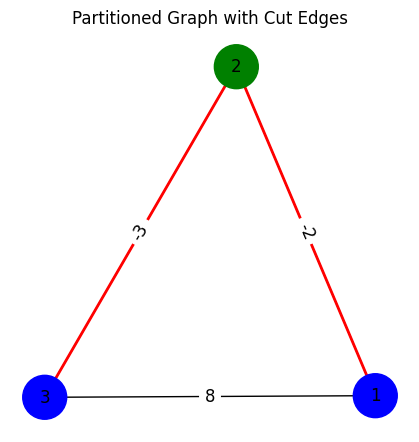

In [42]:
# Identify nodes in each partition
partition_0 = [i + 1 for i, val in enumerate(optimal_vector) if val == 0]
partition_1 = [i + 1 for i, val in enumerate(optimal_vector) if val == 1]

# Assign colors to nodes based on partition
node_colors = []
for node in G.nodes:
    if node in partition_0:
        node_colors.append("green")  # Nodes in partition 0
    elif node in partition_1:
        node_colors.append("blue")   # Nodes in partition 1

# Highlight the edges in the cut
cut_edges = [(u, v) for u, v in G.edges if (u in partition_0 and v in partition_1) or (u in partition_1 and v in partition_0)]

# Plot the graph with node colors and cut edges
plt.figure(figsize=(4, 4))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000)
nx.draw_networkx_edges(G, pos, edgelist=cut_edges, edge_color="red", width=2)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)
plt.title("Partitioned Graph with Cut Edges")
plt.show()


In [71]:
from pyqubo import Array, solve_qubo
import numpy as np

In [73]:
# Create binary variables
x = Array.create('x', shape=Q.shape[0], vartype='BINARY')

# Formulate the QUBO model
qubo_model = sum(Q[i, j] * x[i] * x[j] for i in range(Q.shape[0]) for j in range(Q.shape[1]))
qubo_model = qubo_model.compile()

# Generate the QUBO dictionary
qubo, offset = qubo_model.to_qubo()

# Solve the QUBO problem using the default solver
solution = solve_qubo(qubo)

# Extract results
optimal_solution = np.array([solution[f'x[{i}]'] for i in range(Q.shape[0])])
print("Optimal solution (binary vector):", optimal_solution)
print("Optimal cost:", sum(Q[i, j] * optimal_solution[i] * optimal_solution[j] for i in range(Q.shape[0]) for j in range(Q.shape[1])))

Optimal solution (binary vector): [1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1]
Optimal cost: -79.3299999999999


C:\Users\mysore\AppData\Local\Temp\ipykernel_66696\229288507.py:12: DeprecationWarning: Call to deprecated function (or staticmethod) solve_qubo. (You should use simulated annealing sampler of dwave-neal directly.) -- Deprecated since version 0.4.0.
  solution = solve_qubo(qubo)


## Solving using classical baseline Gurobi

This uses a branch-and-bound strategy to find the near-optimal solution

In [74]:
import gurobipy as gp
from gurobipy import GRB

In [75]:
# Initialize Gurobi model
model = gp.Model("QUBO")

# Create binary variables
n = Q.shape[0]
x = model.addVars(n, vtype=GRB.BINARY, name="x")

# Add the objective function
objective = gp.QuadExpr()
for i in range(n):
    for j in range(n):
        objective += Q[i, j] * x[i] * x[j]

model.setObjective(objective, GRB.MINIMIZE)

# Optimize the model
model.optimize()

# Extract the optimal solution
optimal_solution = np.array([x[i].x for i in range(n)])
print("Optimal solution (binary vector):", optimal_solution)
print("Optimal cost:", model.objVal)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12800H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 0 rows, 30 columns and 0 nonzeros
Model fingerprint: 0x53c92d0e
Model has 464 quadratic objective terms
Variable types: 0 continuous, 30 integer (30 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e-02, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -79.3300000
Presolve time: 0.01s
Presolved: 0 rows, 30 columns, 0 nonzeros
Presolved model has 464 quadratic objective terms
Variable types: 0 continuous, 30 integer (30 binary)

Root relaxation: objective -9.668411e+01, 58 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node   

# QAOA Solver (Qiskit)

This is a Variational Quantum Algorithm (VQA)


 - VQA is a paragidm of parameterized quantum circuits and a classical optimizer.
 - The states of the qubits are guided using parameterized quantum gates.
 - The parameters ($\vec{\theta}$) of the parametrized quantum gates are updated using the classical optimizers in an iterative way.

In [43]:
from qiskit.circuit.library import Diagonal
from qiskit_optimization.applications import Maxcut
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.primitives import Sampler
from qiskit.result import QuasiDistribution

from qiskit_algorithms.minimum_eigensolvers import QAOA, NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import COBYLA
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit_algorithms.utils import algorithm_globals

In [47]:
def objective_value(x: np.ndarray, w: np.ndarray) -> float:
    """Compute the value of a cut.
    Args:
        x: Binary string as numpy array.
        w: Adjacency matrix.
    Returns:
        Value of the cut.
    """
    cost = 0
    for i in range(len(x)):
        for j in range(len(x)):
            cost = cost + w[i,j]*x[i]*(1-x[j])
    return cost

def bitfield(n: int, L: int) -> list[int]:
    result = np.binary_repr(n, L)
    return [int(digit) for digit in result]  # [2:] to chop off the "0b" part

def sample_most_likely(state_vector) -> np.ndarray:
    """Compute the most likely binary string from state vector.
    Args:
        state_vector: State vector or quasi-distribution.

    Returns:
        Binary string as an array of ints.
    """
    if isinstance(state_vector, QuasiDistribution):
        values = list(state_vector.values())
    else:
        values = state_vector
    n = int(np.log2(len(values)))
    k = np.argmax(np.abs(values))
    x = bitfield(k, n)
    x.reverse()
    return np.asarray(x)

In [48]:
def qaoa_solver(G, reps=1):
  n = G.number_of_nodes()
  w = -1 * nx.adjacency_matrix(G).todense()
  max_cut = Maxcut(w)
  qp = max_cut.to_quadratic_program()
  # print(qp.prettyprint())
  qubitOp, offset = qp.to_ising()
  sampler = Sampler()
  algorithm_globals.random_seed = 123
  optimizer = COBYLA()
  qaoa = QAOA(sampler, optimizer, reps=reps)
  result = qaoa.compute_minimum_eigenvalue(qubitOp)
  x = sample_most_likely(result.eigenstate)
  return x, objective_value(x, w)

In [49]:
qaoa_solver(G, reps=1)

C:\Users\mysore\AppData\Local\Temp\ipykernel_66696\3735664337.py:8: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


(array([0, 1, 0]), np.int64(5))

# Quantum Annealing

(a.k.a adiabatic quantum computing)

D-Wave

In [76]:
# ! pip install dwave-ocean-sdk
# ! pip install pandas

In [77]:
import time
import dimod
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
from qiskit_optimization.applications import Maxcut
import networkx as nx
import numpy as np

In [78]:

def dwave_solver(linear, quadratic, private_token, runs=10000, **kwargs):
  """
  Solve a binary quadratic model using D-Wave sampler.

  Parameters:
  linear (dict): Linear coefficients of the model.
  quadratic (dict): Quadratic coefficients of the model.
  private_token (str): API token for D-Wave.
  runs (int): Number of reads for the sampler.

  Returns:
  dimod.SampleSet: Sample set returned by D-Wave sampler.
  float: Connection time.
  float: Embedding time.
  float: Response time.
  """
  vartype = dimod.BINARY
  bqm = dimod.BinaryQuadraticModel(linear, quadratic, 0.0, vartype)
  start_time = time.time()
  dwave_sampler = DWaveSampler(token = private_token, solver={'topology__type': 'pegasus'})
  connection_time = time.time() - start_time

  start_time = time.time()
  sampler = EmbeddingComposite(dwave_sampler)
  embedding_time = time.time() - start_time
  start_time = time.time()
  sample_set = sampler.sample(bqm, num_reads=runs)
  response_time = time.time() - start_time
  return sample_set, connection_time, embedding_time, response_time

def annealer_solver(G, private_token, n_samples=2000, **kwargs):
  """
  Solve the Maxcut problem on graph G using a D-Wave annealer.

  Parameters:
  G (networkx.Graph): Graph for which Maxcut is to be solved.
  private_token (str): API token for D-Wave.
  n_samples (int): Number of samples to collect.

  Returns:
  pandas.DataFrame: Dataframe containing samples.
  dict: Dictionary containing information about execution times.
  """
  start_time = time.time()
  w = -1 * nx.adjacency_matrix(G).todense()
  max_cut = Maxcut(w)
  qp = max_cut.to_quadratic_program()
  linear = qp.objective.linear.coefficients.toarray(order=None, out=None)
  quadratic = qp.objective.quadratic.coefficients.toarray(order=None, out=None)
  linear = {int(idx):-round(value,2) for idx,value in enumerate(linear[0])}
  quadratic = {(int(iy),int(ix)):-quadratic[iy, ix] for iy, ix in np.ndindex(quadratic.shape) if iy<ix and abs(quadratic[iy, ix])!=0}
  problem_formulation_time = time.time() - start_time
  sample_set, connection_time, embedding_time, response_time = dwave_solver(linear, quadratic, private_token, runs=n_samples)
  info_dict = sample_set.info['timing'].copy()

  start_time = time.time()
  samples_df = sample_set.to_pandas_dataframe()
  sample_fetch_time = time.time() - start_time

  info_dict['problem_formulation_time'] = problem_formulation_time
  info_dict['connection_time'] = connection_time
  info_dict['embedding_time'] = embedding_time
  info_dict['response_time'] = response_time
  info_dict['sample_fetch_time'] = sample_fetch_time
  return samples_df, info_dict

Create an account at: [https://cloud.dwavesys.com/leap/login?next=/leap]

Get the private token and replace the function call below as:

samples_dataframe, execution_info_dict = annealer_solver(G, private_token = 'xxx-xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

In [79]:
start_time = time.time()
samples_dataframe, execution_info_dict = annealer_solver(G, private_token = open('token.txt','r').read())
total_time = time.time()-start_time
execution_info_dict['total_time'] = total_time
execution_info_dict

{'qpu_sampling_time': 279760.0,
 'qpu_anneal_time_per_sample': 20.0,
 'qpu_readout_time_per_sample': 99.3,
 'qpu_access_time': 295688.76,
 'qpu_access_overhead_time': 16513.24,
 'qpu_programming_time': 15928.76,
 'qpu_delay_time_per_sample': 20.58,
 'post_processing_overhead_time': 133.0,
 'total_post_processing_time': 133.0,
 'problem_formulation_time': 0.02732062339782715,
 'connection_time': 0.12771892547607422,
 'embedding_time': 0.040627241134643555,
 'response_time': 0.9491546154022217,
 'sample_fetch_time': 0.0010721683502197266,
 'total_time': 4.10429310798645}

In [80]:
samples_dataframe

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,chain_break_fraction,energy,num_occurrences
0,0,0,0,0,0,1,1,0,1,0,...,1,1,1,0,1,1,0,0.000000,-30.26,54
1,1,1,1,1,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0.000000,-30.26,99
2,1,1,1,1,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0.000000,-30.24,112
3,0,0,0,0,0,0,1,0,1,0,...,1,1,1,0,1,1,0,0.000000,-30.24,22
4,1,1,1,1,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0.000000,-29.91,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,0,1,0,0,1,0,1,1,...,0,0,1,0,1,1,0,0.033333,-21.83,1
873,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0.000000,-17.12,1
874,1,1,0,0,0,0,1,0,1,1,...,0,1,1,0,1,0,1,0.033333,-21.16,1
875,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,1,1,1,0.033333,-18.97,1


In [81]:
solution_binary_string = samples_dataframe.iloc[0][:-3]
solution_binary_string

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     1.0
6     1.0
7     0.0
8     1.0
9     0.0
10    1.0
11    0.0
12    0.0
13    1.0
14    0.0
15    0.0
16    0.0
17    1.0
18    0.0
19    0.0
20    1.0
21    0.0
22    0.0
23    1.0
24    1.0
25    1.0
26    0.0
27    1.0
28    1.0
29    0.0
Name: 0, dtype: float64